# Image Classification using Convolutional Neural Network (CNN)

In [35]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

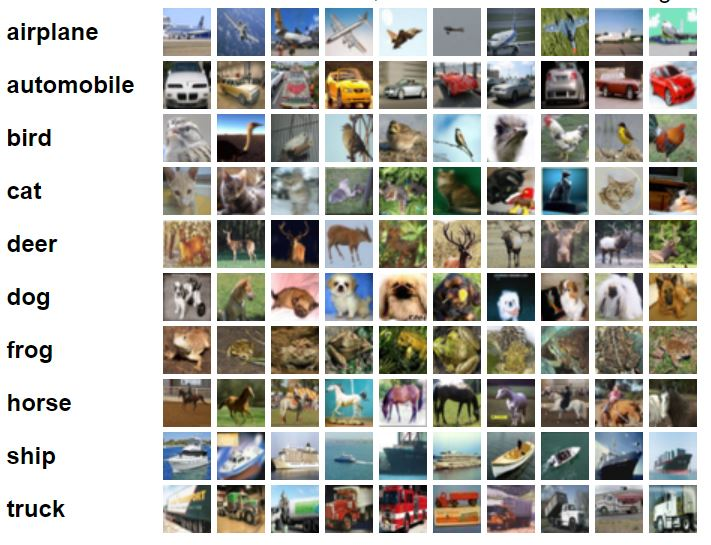

In [36]:
#Dataset Import
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

### Check the Size of Train and Test data

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

In [40]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Here, y_train is 2D array. To simplify, we need it 1D using reshape method!

In [41]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [42]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [43]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

**Transformed to 1D**

## Class Declaration

In [44]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Now, plotting the images to see what they actually are! (Using Matplotlib functions)

In [45]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

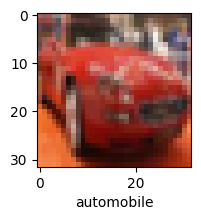

In [46]:
plot_sample(X_train, y_train, 5)

###Normalization

As array values are ranging from 0 to 255, normalizing this array helps in comparing within 0 to 1 range.

In [47]:
X_train = X_train / 255
X_test = X_test / 255

In [48]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [49]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

#Building with ANN

In [50]:
ann = models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation = "relu"),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

ann.compile(
    optimizer = "SGD",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

ann.fit(X_train, y_train, epochs =10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8081 - accuracy: 0.3562
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6241 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5419 - accuracy: 0.4565
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4855 - accuracy: 0.4789
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4344 - accuracy: 0.4939
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3914 - accuracy: 0.5113
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3503 - accuracy: 0.5272
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3160 - accuracy: 0.5363
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2819 - accuracy: 0.5500
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.251

Using ANN, got only **56%** training accuracy.


## Classification Report for ANN

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print(f"Classification Report: \n {classification_report(y_test, y_pred_classes)}")

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.39      0.50      1000
           1       0.70      0.62      0.65      1000
           2       0.36      0.39      0.37      1000
           3       0.39      0.35      0.37      1000
           4       0.29      0.68      0.41      1000
           5       0.57      0.17      0.26      1000
           6       0.66      0.40      0.50      1000
           7       0.50      0.66      0.57      1000
           8       0.64      0.64      0.64      1000
           9       0.59      0.59      0.59      1000

    accuracy                           0.49     10000
   macro avg       0.54      0.49      0.49     10000
weighted avg       0.54      0.49      0.49     10000



Now's the time to implement **CNN**!

#Building with CNN

In [52]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64,kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [53]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [54]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5108 - accuracy: 0.4541
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1585 - accuracy: 0.5921
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0324 - accuracy: 0.6407
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9483 - accuracy: 0.6693
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8874 - accuracy: 0.6924
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8359 - accuracy: 0.7102
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7872 - accuracy: 0.7280
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7514 - accuracy: 0.7400
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7143 - accuracy: 0.7535
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.678

Here, the TRAINING accuracy using CNN is 76, much better than ANN.(Comparing at 10th epoch)

Also, CNN computing is faster

In [55]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9268 - accuracy: 0.6873


[0.9268121123313904, 0.6873000264167786]

In [56]:
#Prediction
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.72271603e-03, 5.13241321e-05, 2.74612065e-02, 5.59218168e-01,
        3.01025175e-05, 5.34545332e-02, 4.03718166e-02, 5.06799115e-05,
        3.17494869e-01, 1.44533551e-04],
       [3.72395129e-03, 1.07448138e-01, 6.68560606e-05, 8.29894191e-07,
        5.46207332e-07, 1.07548438e-07, 1.05581321e-08, 1.66991327e-07,
        8.87092113e-01, 1.66740303e-03],
       [7.67711699e-02, 4.64306355e-01, 1.12311384e-02, 1.25232013e-02,
        2.69248313e-03, 1.41704653e-03, 1.66640070e-03, 2.08468339e-03,
        3.06538612e-01, 1.20768994e-01],
       [9.25000250e-01, 5.58851007e-03, 1.21555487e-02, 1.87062961e-03,
        2.35911366e-03, 1.67678576e-04, 3.14968434e-04, 3.32261698e-04,
        5.16121760e-02, 5.98954386e-04],
       [2.72201123e-05, 3.30931175e-06, 1.03830816e-02, 7.91536868e-02,
        1.50924087e-01, 1.66928919e-03, 7.57762372e-01, 3.27821908e-05,
        4.20797587e-05, 2.11569022e-06]], dtype=float32)

In [57]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Look at the `y_classes` and `y_test`. Both came with the same result.

###Example:

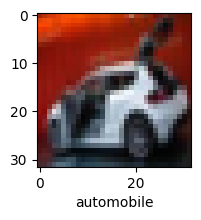

In [59]:
plot_sample(X_test, y_test, 6)

In [60]:
classes[y_classes[6]]

'dog'

# Result: Overall Accuracy is 100%!